In [ ]:
# MIT License
#
# Copyright (c) 2020 Fagner Cunha
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Redes Neurais Completamente Conectadas com TensorFlow

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/alcunha/nn-with-tf/blob/master/Fully-Connected-Neural-Networks-with-TF.ipynb"><img src="./images/colab_logo_32px.png" />Executar no Google Colab</a>
  </td>
  <td>
    <a href="https://github.com/alcunha/nn-with-tf/blob/master/Fully-Connected-Neural-Networks-with-TF.ipynb"><img src="./images/GitHub-Mark-32px.png" />Ver código no GitHub</a>
  </td>
</table>

*“NÃO ENTRE EM PÂNICO”*

(O Guia do Mochileiro das Galáxias)

In [ ]:
! pip install tensorflow pandas matplotlib

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras

## Tensores

Tensores são arrays multi-dimensionais com um mesmo tipo (**dtype**).

#### Rank 0 ("Escalar")

In [2]:
a = tf.constant(4)
b = tf.constant(3.2)
c = tf.constant('casa')

In [3]:
print(a)
print(b)
print(c)

tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(3.2, shape=(), dtype=float32)
tf.Tensor(b'casa', shape=(), dtype=string)


#### Rank 1 ("Vetor")

In [4]:
list1 = tf.constant([4, 3])
list2 = tf.constant([3.2, 2])
list3 = tf.constant(['casa', 'rua'])

In [5]:
print(list1)
print(list2)
print(list3)

tf.Tensor([4 3], shape=(2,), dtype=int32)
tf.Tensor([3.2 2. ], shape=(2,), dtype=float32)
tf.Tensor([b'casa' b'rua'], shape=(2,), dtype=string)


Lista com tipos diferentes vai gerar erro:

In [6]:
#list4 = tf.constant(['casa', 4])

#### Rank 2 ("Matriz")

In [7]:
mat1 = tf.constant([[2, 3],
                    [4, 5]])
mat2 = tf.constant([[1, 1],
                    [1, 1.]])

In [8]:
print(mat1)
print(mat2)

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


Convertendo os valores de um tensor para o NumPy:

In [9]:
mat1.numpy()

array([[2, 3],
       [4, 5]], dtype=int32)

In [10]:
zeros = tf.zeros([2, 3], dtype=tf.int32)
print(zeros)

tf.Tensor(
[[0 0 0]
 [0 0 0]], shape=(2, 3), dtype=int32)


In [11]:
ones = tf.ones([3, 3, 2], dtype=tf.float32)
print(ones)

tf.Tensor(
[[[1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]]], shape=(3, 3, 2), dtype=float32)


In [12]:
tf.constant([1, 2, 3, 4, 5, 6], shape=(2,3), dtype=tf.float32)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

### Operações

In [13]:
a = tf.cast(a, tf.float32)

In [14]:
a + b

<tf.Tensor: shape=(), dtype=float32, numpy=7.2>

In [15]:
tf.add(a, b)

<tf.Tensor: shape=(), dtype=float32, numpy=7.2>

In [16]:
print(list1)
print(list1.shape)
print(list1.dtype)
print(list1 + tf.ones(list1.shape, dtype=list1.dtype))

tf.Tensor([4 3], shape=(2,), dtype=int32)
(2,)
<dtype: 'int32'>
tf.Tensor([5 4], shape=(2,), dtype=int32)


Multiplicação de matrizes

In [17]:
mat1 = tf.constant([[1, 2, 3],
                   [4, 5, 6]])

mat2 = tf.constant([
    [1, 2, 3, 4],
    [1, 2, 3, 4],
    [1, 2, 3, 4],
])

In [18]:
print(mat1.shape)
print(mat2.shape)

(2, 3)
(3, 4)


In [19]:
tf.matmul(mat1, mat2)

<tf.Tensor: shape=(2, 4), dtype=int32, numpy=
array([[ 6, 12, 18, 24],
       [15, 30, 45, 60]], dtype=int32)>

In [20]:
mat1 * mat1

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 1,  4,  9],
       [16, 25, 36]], dtype=int32)>

#### Bônus: Números complexos

In [21]:
tf.complex(a, b)

<tf.Tensor: shape=(), dtype=complex64, numpy=(4+3.2j)>

## Redes Neurais Artificiais

Redes neurais artificiais são modelos computacionais inspirados na estrutura do sistema
nervoso de animais que adquire conhecimento por meio da experiência.

Um neurônio articial (do tipo Perceptron) é composto por pesos W que multiplicam a entrada X e uma função de ativação f para determinar a saída Y.

<img src="./images/Perceptron-bias.png" width="600">
<center>Figura 1: Esquema de um neurônio articial (Perceptron)</center>
<center>Fonte: [1]</center>

No exemplo da figura acima:

y = f(x1\*w1 + x2\*w2)

y2 = f(x1\*w1 + x2\*w2 + b)

#### Rede neural completamente conectada

Os neurônios podem ser dispostos em camadas e várias dessas camadas podem ser encadeadas até a saída da rede. Neurônios em uma camada completamente conectada tem conexões a todas as "saídas" da camada anterior. Matematicamente, os pesos da rede podem ser representados como matrizes.

<img src="./images/MultiLayer_Neural_Network.png" width="600">
<center>Figura 2: Esquema de uma rede completamente conectada</center>
<center>Fonte: [2]</center>

Durante o treinamento, os pesos de uma rede neural são otimizados de acordo com o erro que é retropropagado ao longo das camadas.

## Exemplo Prático: NN para o dataset Titanic

1. Pré-processamento
2. Construção do pipeline de dados
3. Construção do modelo
4. Treinamento
5. Avaliação do modelo e visualização dos resultados

#### Pré-processamento do dataset

In [22]:
TITANIC_TRAIN_URL = "https://storage.googleapis.com/tf-datasets/titanic/train.csv"
TITANIC_TEST_URL = "https://storage.googleapis.com/tf-datasets/titanic/eval.csv"

In [23]:
titanic_train_path = keras.utils.get_file('titanic_train.csv', TITANIC_TRAIN_URL)
titanic_test_path = keras.utils.get_file('titanic_test.csv', TITANIC_TEST_URL)

In [24]:
train_df = pd.read_csv(titanic_train_path)
train_df.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [25]:
selected_columns = ['class', 'sex', 'age', 'n_siblings_spouses', 'fare', 'survived']
train_df = train_df[selected_columns]
train_df.head()

,class,sex,age,n_siblings_spouses,fare,survived
0,Third,male,22.0,1,7.2500,0
1,First,female,38.0,1,71.2833,1
2,Third,female,26.0,0,7.9250,1
3,First,female,35.0,1,53.1000,1
4,Third,male,28.0,0,8.4583,0


In [26]:
print(train_df['class'].unique())
print(train_df['sex'].unique())

['Third' 'First' 'Second']
['male' 'female']


Feature enconde:

In [27]:
pd.get_dummies(train_df['class']).head()

,First,Second,Third
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [28]:
train_df = pd.concat([train_df, pd.get_dummies(train_df['class']), pd.get_dummies(train_df['sex'])], axis=1)
train_df.head()

,class,sex,age,n_siblings_spouses,fare,survived,First,Second,Third,female,male
0,Third,male,22.0,1,7.2500,0,0,0,1,0,1
1,First,female,38.0,1,71.2833,1,1,0,0,1,0
2,Third,female,26.0,0,7.9250,1,0,0,1,1,0
3,First,female,35.0,1,53.1000,1,1,0,0,1,0
4,Third,male,28.0,0,8.4583,0,0,0,1,0,1


In [29]:
train_df = train_df.drop(columns=['class', 'sex'])
train_df.head()

,age,n_siblings_spouses,fare,survived,First,Second,Third,female,male
0,22.0,1,7.2500,0,0,0,1,0,1
1,38.0,1,71.2833,1,1,0,0,1,0
2,26.0,0,7.9250,1,0,0,1,1,0
3,35.0,1,53.1000,1,1,0,0,1,0
4,28.0,0,8.4583,0,0,0,1,0,1


In [30]:
train_df_labels = train_df[['survived']].copy()
train_df_labels.head()

,survived
0,0
1,1
2,1
3,1
4,0


In [31]:
train_df_features = train_df.drop(columns=['survived'])
train_df_features.head()

,age,n_siblings_spouses,fare,First,Second,Third,female,male
0,22.0,1,7.2500,0,0,1,0,1
1,38.0,1,71.2833,1,0,0,1,0
2,26.0,0,7.9250,0,0,1,1,0
3,35.0,1,53.1000,1,0,0,1,0
4,28.0,0,8.4583,0,0,1,0,1


Replicando para o conjunto de teste:

In [32]:
test_df = pd.read_csv(titanic_test_path)
test_df = test_df[selected_columns]
test_df = pd.concat([test_df, pd.get_dummies(test_df['class']), pd.get_dummies(test_df['sex'])], axis=1)
test_df = test_df.drop(columns=['class', 'sex'])
test_df_labels = test_df[['survived']].copy()
test_df_features = test_df.drop(columns=['survived'])

In [33]:
test_df_features.head()

,age,n_siblings_spouses,fare,First,Second,Third,female,male
0,35.0,0,8.0500,0,0,1,0,1
1,54.0,0,51.8625,1,0,0,0,1
2,58.0,0,26.5500,1,0,0,1,0
3,55.0,0,16.0000,0,1,0,1,0
4,34.0,0,13.0000,0,1,0,0,1


In [34]:
test_df_labels.head()

,survived
0,0
1,0
2,1
3,1
4,1


#### Construindo o pipeline de dados (tf.data.Dataset)

O `tf.data` é uma API do TensorFlow que permite construir pipelines de dados. Essa API é altamente flexível, permitindo a construção de pipelines complexos a partir de operações simples.

In [35]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_df_features.values, train_df_labels.values))
test_dataset = tf.data.Dataset.from_tensor_slices((test_df_features.values, test_df_labels.values))

In [36]:
for features, label in train_dataset.take(2):
    print(features)
    print(label)

tf.Tensor([22.    1.    7.25  0.    0.    1.    0.    1.  ], shape=(8,), dtype=float64)
tf.Tensor([0], shape=(1,), dtype=int64)
tf.Tensor([38.      1.     71.2833  1.      0.      0.      1.      0.    ], shape=(8,), dtype=float64)
tf.Tensor([1], shape=(1,), dtype=int64)


In [37]:
SHUFFLE_BUFFER_SIZE = len(train_df_labels)
TEST_LENGHT = len(test_df_labels)
BATCH_SIZE = 16
EPOCHS = 300

In [38]:
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE, drop_remainder=True)

## Se usar a opção epochs para a quantidade de épocas da função fit do modelo, não se deve aplicar o repeat
#train_dataset = train_dataset.repeat(EPOCHS)

In [39]:
for features, label in train_dataset.take(1):
    print(features)
    print(label)

tf.Tensor(
[[ 28.       0.      33.       0.       1.       0.       1.       0.    ]
 [ 33.       0.       9.5      0.       0.       1.       0.       1.    ]
 [ 28.       0.       8.1125   0.       0.       1.       0.       1.    ]
 [ 19.       0.       7.8958   0.       0.       1.       0.       1.    ]
 [ 36.       0.      13.       0.       1.       0.       0.       1.    ]
 [ 24.       2.      18.75     0.       1.       0.       1.       0.    ]
 [ 28.       8.      69.55     0.       0.       1.       0.       1.    ]
 [  7.       4.      39.6875   0.       0.       1.       0.       1.    ]
 [ 28.       3.      25.4667   0.       0.       1.       1.       0.    ]
 [ 14.5      1.      14.4542   0.       0.       1.       1.       0.    ]
 [ 17.       1.     108.9      1.       0.       0.       1.       0.    ]
 [ 28.       0.      13.       0.       1.       0.       1.       0.    ]
 [ 30.       0.      13.       0.       1.       0.       0.       1.    ]
 [ 29.       1

No teste não precisamos aleatorizar as instâncias:

In [40]:
#test_dataset = test_dataset.batch(BATCH_SIZE, drop_remainder=True).repeat(EPOCHS)
test_dataset = test_dataset.batch(BATCH_SIZE, drop_remainder=True)

Pergunta: Por que não deveríamos utilizar `rop_remainder` na avaliação de um experimento real?

### Construindo o modelo

In [41]:
model = keras.Sequential([
    keras.Input(shape=(8,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32),
    keras.layers.Activation('relu'),
    keras.layers.Dense(1)
])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                288       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
activation (Activation)      (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy'])

### Treinamento

In [44]:
## Se não usar o parâmetro epochs, o modelo vai treinar até o pipeline de dados parar de produzir batchs
## Nesse caso, para simular o número de épocas, pode usar o repeat durante a preparação do pipepline
## Para este caso, utilizaremos o epochs e, portanto, não precisa utilizar o repeat no pipeline
history = model.fit(train_dataset,
                      epochs=EPOCHS,
                      validation_data=test_dataset,
                      validation_steps=TEST_LENGHT // BATCH_SIZE)

Epoch 1/300
39/39 [==============================] - 0s 6ms/step - loss: 0.8023 - accuracy: 0.5689 - val_loss: 0.6064 - val_accuracy: 0.6836
Epoch 2/300
39/39 [==============================] - 0s 3ms/step - loss: 0.6308 - accuracy: 0.6715 - val_loss: 0.6876 - val_accuracy: 0.6250
Epoch 3/300
39/39 [==============================] - 0s 3ms/step - loss: 0.6251 - accuracy: 0.6747 - val_loss: 0.6094 - val_accuracy: 0.6523
Epoch 4/300
39/39 [==============================] - 0s 3ms/step - loss: 0.6001 - accuracy: 0.6715 - val_loss: 0.5851 - val_accuracy: 0.6797
Epoch 5/300
39/39 [==============================] - 0s 3ms/step - loss: 0.5860 - accuracy: 0.6651 - val_loss: 0.5825 - val_accuracy: 0.6641
Epoch 6/300
39/39 [==============================] - 0s 3ms/step - loss: 0.5842 - accuracy: 0.6747 - val_loss: 0.5956 - val_accuracy: 0.6250
Epoch 7/300
39/39 [==============================] - 0s 3ms/step - loss: 0.5628 - accuracy: 0.6667 - val_loss: 0.5653 - val_accuracy: 0.6992
Epoch 8/300
3

Epoch 59/300
39/39 [==============================] - 0s 3ms/step - loss: 0.4113 - accuracy: 0.8173 - val_loss: 0.4658 - val_accuracy: 0.7852
Epoch 60/300
39/39 [==============================] - 0s 3ms/step - loss: 0.4060 - accuracy: 0.8173 - val_loss: 0.4590 - val_accuracy: 0.7852
Epoch 61/300
39/39 [==============================] - 0s 3ms/step - loss: 0.3992 - accuracy: 0.8301 - val_loss: 0.4678 - val_accuracy: 0.7773
Epoch 62/300
39/39 [==============================] - 0s 3ms/step - loss: 0.4156 - accuracy: 0.8157 - val_loss: 0.4556 - val_accuracy: 0.7812
Epoch 63/300
39/39 [==============================] - 0s 3ms/step - loss: 0.4121 - accuracy: 0.8093 - val_loss: 0.4673 - val_accuracy: 0.7891
Epoch 64/300
39/39 [==============================] - 0s 3ms/step - loss: 0.4032 - accuracy: 0.8317 - val_loss: 0.4581 - val_accuracy: 0.7812
Epoch 65/300
39/39 [==============================] - 0s 3ms/step - loss: 0.4071 - accuracy: 0.8189 - val_loss: 0.4706 - val_accuracy: 0.7812
Epoch 

39/39 [==============================] - 0s 3ms/step - loss: 0.3861 - accuracy: 0.8237 - val_loss: 0.4463 - val_accuracy: 0.8086
Epoch 117/300
39/39 [==============================] - 0s 3ms/step - loss: 0.3900 - accuracy: 0.8109 - val_loss: 0.4501 - val_accuracy: 0.8008
Epoch 118/300
39/39 [==============================] - 0s 3ms/step - loss: 0.3873 - accuracy: 0.8189 - val_loss: 0.4605 - val_accuracy: 0.7930
Epoch 119/300
39/39 [==============================] - 0s 3ms/step - loss: 0.3871 - accuracy: 0.8253 - val_loss: 0.4617 - val_accuracy: 0.8008
Epoch 120/300
39/39 [==============================] - 0s 3ms/step - loss: 0.4011 - accuracy: 0.8141 - val_loss: 0.4536 - val_accuracy: 0.7969
Epoch 121/300
39/39 [==============================] - 0s 3ms/step - loss: 0.4057 - accuracy: 0.8173 - val_loss: 0.4693 - val_accuracy: 0.8008
Epoch 122/300
39/39 [==============================] - 0s 3ms/step - loss: 0.4107 - accuracy: 0.8157 - val_loss: 0.4532 - val_accuracy: 0.8008
Epoch 123/300

39/39 [==============================] - 0s 3ms/step - loss: 0.3849 - accuracy: 0.8237 - val_loss: 0.4528 - val_accuracy: 0.8086
Epoch 174/300
39/39 [==============================] - 0s 3ms/step - loss: 0.3774 - accuracy: 0.8237 - val_loss: 0.4487 - val_accuracy: 0.8086
Epoch 175/300
39/39 [==============================] - 0s 3ms/step - loss: 0.3927 - accuracy: 0.8301 - val_loss: 0.4633 - val_accuracy: 0.8047
Epoch 176/300
39/39 [==============================] - 0s 3ms/step - loss: 0.3953 - accuracy: 0.8237 - val_loss: 0.4694 - val_accuracy: 0.8086
Epoch 177/300
39/39 [==============================] - 0s 3ms/step - loss: 0.3861 - accuracy: 0.8189 - val_loss: 0.4812 - val_accuracy: 0.7969
Epoch 178/300
39/39 [==============================] - 0s 3ms/step - loss: 0.3800 - accuracy: 0.8157 - val_loss: 0.4481 - val_accuracy: 0.8086
Epoch 179/300
39/39 [==============================] - 0s 3ms/step - loss: 0.3749 - accuracy: 0.8253 - val_loss: 0.4726 - val_accuracy: 0.7969
Epoch 180/300

39/39 [==============================] - 0s 3ms/step - loss: 0.3849 - accuracy: 0.8285 - val_loss: 0.4587 - val_accuracy: 0.8164
Epoch 231/300
39/39 [==============================] - 0s 3ms/step - loss: 0.3893 - accuracy: 0.8237 - val_loss: 0.4464 - val_accuracy: 0.8164
Epoch 232/300
39/39 [==============================] - 0s 3ms/step - loss: 0.3760 - accuracy: 0.8317 - val_loss: 0.4514 - val_accuracy: 0.8164
Epoch 233/300
39/39 [==============================] - 0s 3ms/step - loss: 0.3715 - accuracy: 0.8349 - val_loss: 0.4523 - val_accuracy: 0.8164
Epoch 234/300
39/39 [==============================] - 0s 3ms/step - loss: 0.3755 - accuracy: 0.8301 - val_loss: 0.4509 - val_accuracy: 0.8125
Epoch 235/300
39/39 [==============================] - 0s 3ms/step - loss: 0.3666 - accuracy: 0.8462 - val_loss: 0.4485 - val_accuracy: 0.8164
Epoch 236/300
39/39 [==============================] - 0s 3ms/step - loss: 0.3681 - accuracy: 0.8381 - val_loss: 0.4472 - val_accuracy: 0.8203
Epoch 237/300

39/39 [==============================] - 0s 3ms/step - loss: 0.3613 - accuracy: 0.8365 - val_loss: 0.4411 - val_accuracy: 0.8086
Epoch 288/300
39/39 [==============================] - 0s 3ms/step - loss: 0.3683 - accuracy: 0.8365 - val_loss: 0.4445 - val_accuracy: 0.8164
Epoch 289/300
39/39 [==============================] - 0s 3ms/step - loss: 0.3676 - accuracy: 0.8301 - val_loss: 0.4859 - val_accuracy: 0.8008
Epoch 290/300
39/39 [==============================] - 0s 3ms/step - loss: 0.3635 - accuracy: 0.8349 - val_loss: 0.4445 - val_accuracy: 0.8164
Epoch 291/300
39/39 [==============================] - 0s 3ms/step - loss: 0.3702 - accuracy: 0.8413 - val_loss: 0.4368 - val_accuracy: 0.8125
Epoch 292/300
39/39 [==============================] - 0s 3ms/step - loss: 0.3651 - accuracy: 0.8349 - val_loss: 0.4567 - val_accuracy: 0.8125
Epoch 293/300
39/39 [==============================] - 0s 3ms/step - loss: 0.3635 - accuracy: 0.8365 - val_loss: 0.4409 - val_accuracy: 0.8125
Epoch 294/300

### Resultados

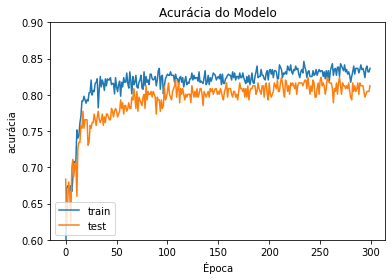

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim([0.6, 0.9])
plt.title('Acurácia do Modelo')
plt.ylabel('acurácia')
plt.xlabel('Época')
plt.legend(['train', 'test'], loc='lower left')
plt.show()

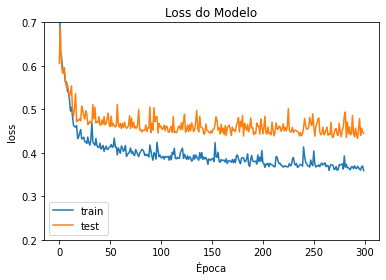

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim([0.2, 0.7])
plt.title('Loss do Modelo')
plt.ylabel('loss')
plt.xlabel('Época')
plt.legend(['train', 'test'], loc='lower left')
plt.show()

### Predição

In [47]:
features, labels = next(iter(test_dataset))

In [48]:
features.numpy()[0]

array([35.  ,  0.  ,  8.05,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ])

In [49]:
labels.numpy()

array([[0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0]])

In [50]:
predictions = model.predict(features.numpy())
predictions

array([[-2.2222183 ],
       [-1.338894  ],
       [ 2.6360776 ],
       [ 0.75812083],
       [-2.0837886 ],
       [ 0.79757637],
       [-2.864997  ],
       [-2.0089302 ],
       [-1.3888214 ],
       [ 0.592774  ],
       [ 0.40834448],
       [-1.9926797 ],
       [ 7.6329727 ],
       [-0.12902291],
       [ 2.0846493 ],
       [-7.277063  ]], dtype=float32)

In [51]:
for pred, label in zip(tf.sigmoid(predictions).numpy(), labels.numpy()):
    print("Probabilidade: {:.2%}, Sobreviveu: {}".format(pred[0], ("Sim" if bool(label[0]) else "Não")))

Probabilidade: 9.78%, Sobreviveu: Não
Probabilidade: 20.77%, Sobreviveu: Não
Probabilidade: 93.31%, Sobreviveu: Sim
Probabilidade: 68.09%, Sobreviveu: Sim
Probabilidade: 11.07%, Sobreviveu: Sim
Probabilidade: 68.95%, Sobreviveu: Sim
Probabilidade: 5.39%, Sobreviveu: Não
Probabilidade: 11.83%, Sobreviveu: Não
Probabilidade: 19.96%, Sobreviveu: Não
Probabilidade: 64.40%, Sobreviveu: Sim
Probabilidade: 60.07%, Sobreviveu: Sim
Probabilidade: 12.00%, Sobreviveu: Não
Probabilidade: 99.95%, Sobreviveu: Sim
Probabilidade: 46.78%, Sobreviveu: Não
Probabilidade: 88.94%, Sobreviveu: Sim
Probabilidade: 0.07%, Sobreviveu: Não


### Referências

[1] File:Perceptron-bias.svg. Disponível em: https://commons.wikimedia.org/wiki/File:Perceptron-bias.svg. Acesso em: 03 de julho de 2020.

[2] File:Multi-Layer Neural Network-Vector.svg. Disponível em: https://commons.wikimedia.org/wiki/File:Multi-Layer_Neural_Network-Vector.svg. Acesso em: 03 de julho de 2020.